# MI-ADM: introduction & so on

  * The aim of this notebook is to help you to get an idea what is a usual data mining use case:
      1. Get the data.
      2. Explore and clean the data and try to uderstand them as match as possible.
      3. Use some reasonably selected method (here kNN = $k$ nearest neigbours) to construct a model.
      4. Validate the model = tune its parameters (here the paramter $k$).
      5. Evaluate the model (using idependent subset of data = test data).
      6. Iterate until you are happy (or desperate).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
matplotlib.style.use('ggplot')

## Loading and exploring MNIST data

  * **Pandas** package has a lot of methods for importing *tabular* data, try to write `pd.read_` and hit `Tab` to get an idea.
  * We use `pd.read_csv` to load data in csv format. To get help on this method write `pd.read_csv?` and run the cell.
  * The data are downloaded from [kaggle.com](https://www.kaggle.com/c/digit-recognizer/overview).

In [2]:
data = pd.read_csv('train.csv')

### Basic data exploration

  * There are some helpful method of `pandas.DataFrame`, type e.g. `data.describe?` to learn more.
  * This data set does not contain any missing values or other inconsistence so no cleaning is needed. **This is usually not the case**.

In [3]:
display(data.shape)
display(data.describe())
data.info()

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Classification task
  * Each row of our data represent 28 x 28 pixels of gray-scale image with an hand-written numbers 0 to 9, this number is stored in the *label* feature.
  * First row of pixels is stored in the features *pixel0, pixel1, ..., pixel27*, second row in the features *pixel28, ..., pixel55* and so on.
  * Our aim is to construct a model that for a given 28x28 image of hand-written number read this number correctly.

### Is balancing needed?
  * If, for instance, our dataset contains 90% of images of number 9, some data mining methods could have a problem and would tend to predict 9 too often.
  * In such cases one need to balance the data using some data balancing method (e.g. [Smote](https://www.jair.org/media/953/live-953-2037-jair.pdf), see also MI-PDD).
  * But our dataset is well balanced:

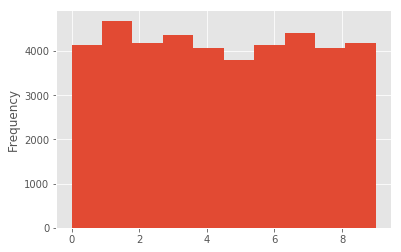

In [4]:
data.label.plot.hist()

### Basic data cleaning
  * From the result of `data.describe` method we can see that there are some pixels that are black for all images.
  * These pixels (= features) carry no information so it is reasonable to get rid off them.

In [5]:
zero_treshold = 10 ### This three # denote a parameter you are encouraged to play with.
nonzero_columns = data.columns[data.max() > zero_treshold].drop(['label'], 'ignore')
NZdata = pd.concat([data['label'], data[nonzero_columns]], axis = 1)
print(data.shape[1], NZdata.shape[1])

785 706


In [6]:
data.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

### Spliting the dataset to train and test part

In [7]:
dtrain, dtest = train_test_split(NZdata, test_size=0.25, random_state=570)
X = dtrain.drop(['label'], axis = 1, errors = 'ignore')
y = dtrain.label
Xtest = dtest.drop(['label'], axis = 1, errors = 'ignore')
ytest = dtest.label

In [8]:
X.shape

(31500, 705)

### Applying k-nearest neighbours for a given k

  * We use the `sklearn` implementation of kNN.
  * Check the documentation of the method: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'brute', p = 2)

In [10]:
%%time 
# cell magic to measure the CPU time needed for running the cell
knn.fit(X,y)

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 29.3 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### Evaluating the model

  * We use our kNN model to predict the label for the test dataset.
  * Then we compare these predicted labels with the real ones.

In [11]:
%%time
ypredict = knn.predict(Xtest)

CPU times: user 38.9 s, sys: 4.08 s, total: 43 s
Wall time: 31.2 s


In [12]:
ypredict

array([9, 3, 9, ..., 9, 5, 2])

In [13]:
res = pd.DataFrame(np.matrix([ypredict, ytest, ypredict - ytest]).T)
res.columns = ['predict', 'real', 'diff']
print('number of well predicted = {0} out of {1} ({2:.2f} %)'.
      format(res[res['diff'] == 0].shape[0], ytest.shape[0], 100*res[res['diff'] == 0].shape[0]/ytest.shape[0]))

number of well predicted = 10160 out of 10500 (96.76 %)


### Classification metrics

  * See [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a list of various metrics to evaluate a classification model.

In [14]:
import sklearn.metrics as metrics
print('accuracy_score: {0:.6f}'.format(metrics.accuracy_score(ytest,ypredict)))
metrics.confusion_matrix(ytest, ypredict)

accuracy_score: 0.967619


array([[ 982,    0,    0,    0,    0,    2,    4,    0,    0,    1],
       [   0, 1147,    1,    0,    0,    0,    1,    2,    0,    1],
       [   6,    9,  987,    6,    0,    0,    1,   20,    1,    0],
       [   0,    0,    8, 1083,    0,   14,    1,    6,    7,    4],
       [   3,   15,    0,    0, 1050,    0,    1,    2,    0,   23],
       [   3,    5,    1,   14,    1,  921,   10,    0,    0,    4],
       [   8,    1,    0,    1,    2,    3,  966,    0,    0,    0],
       [   0,   14,    1,    1,    3,    0,    0, 1056,    0,   14],
       [   5,    8,    4,   16,    4,   13,    4,    2,  958,   13],
       [   6,    2,    3,    5,   12,    2,    0,   15,    1, 1010]])

### Conclusion

  * kNN with parameter k = 3 has a solid accuracy 96 %.
  * But looking at the score on [kaggle](https://www.kaggle.com/c/digit-recognizer/leaderboard), we could do better.
  * A question is whether we could do better with kNN: 
      * Is there a better choice of the paramater k?
      * Should we use another metrics (e.g. Minkovski norm with different p)?
      * How to choose these paramaters better?

## Choosing a model = tuning of parameters

In general, the strategy of tuning the best parametrs goes like this:
  * We further split the train data to two subsets: train and validate.
  * The usual ratio is train:validate:test = 2:1:1
  * We define a finite set of the respective parameter values, here e.g. $k \in \{1,2,\ldots,30\}$.
  * For all parameters values from this set we "teach" our model for the train dataset and measure its success using the validation subset (this is sometimes called tuning of parameters).
  * Then we evaluate the quality of the model using the test subset as above.
  * It is of high importance to understand why we cannot use the test subset to tune parameters! So why?

In [15]:
# spliting the data
dtrain, dvalidate = train_test_split(dtrain, test_size=0.33, random_state=740)
X = dtrain.drop(['label'], axis = 1, errors = 'ignore')
y = dtrain.label
Xvalid = dvalidate.drop(['label'], axis = 1, errors = 'ignore')
yvalid = dvalidate.label

In [16]:
def knnTest(X,y,Xtest,ytest,k,p = 2,weights = 'uniform'):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', p=p, weights=weights)
    display(knn.fit(X,y))
    ypredict = knn.predict(Xtest)
    return metrics.accuracy_score(ytest,ypredict)

k = 1


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

k = 2


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

k = 3


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

k = 4


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

k = 5


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

k = 6


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

Best accuracy (0.9598) obtained for k = 1


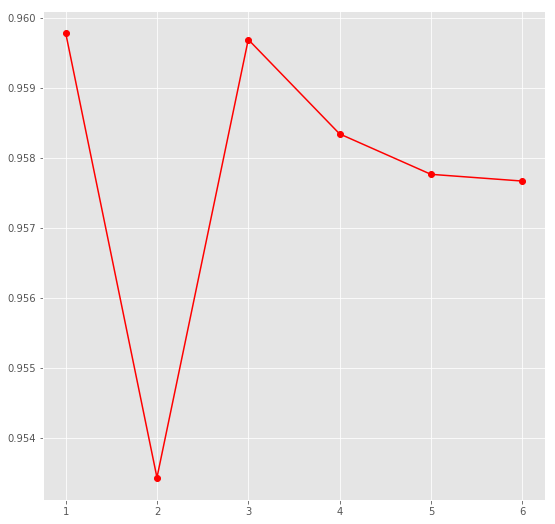

In [17]:
kset = range(1,7)
results = {}
for k in kset:
    print('k =',k)
    results[k] = knnTest(X,y,Xvalid, yvalid, k)
best_k = max(results, key= results.get)
print('Best accuracy ({0:.4f}) obtained for k = {1}'.format(results[best_k], best_k))
plt.figure(figsize=(9,9))
plt.plot(results.keys(), list(results.values()),'or-')

## feature extraction

  * We have 28x28 features representing the pixels but can we "extract" some better features?
  * Extracting features from text/image data is [quite a science](https://books.google.cz/books?hl=en&lr=&id=lytnomY-r7YC&oi=fnd&pg=PP2&dq=feature+extraction+image+data&ots=hnnh1Ooe3G&sig=ci8GnHDDkM6ry7WTrxjzxUMcQJE&redir_esc=y#v=onepage&q=feature%20extraction%20image%20data&f=false).
  * Here we try only a simple stuff.

**idea**
  * We create a new feature that will represent the proportion of non-zero pixels.

In [18]:
black_trashold = 0.5 ### what is a black
# normalize data to interval [0,1], important for kNN!!!!
data2 = NZdata/255
data2.label = NZdata.label
intdata = (NZdata > black_trashold).astype(int) # replace element with 1 if white and with 0 if black
data2['nUsedPixels'] = intdata.sum(axis=1)/intdata.sum(axis=1).max()
display(data2.info())
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 707 entries, label to nUsedPixels
dtypes: float64(706), int64(1)
memory usage: 226.5 MB


None

,label,pixel12,pixel13,pixel14,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,nUsedPixels
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279202
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.698006
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227920
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324786
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740741


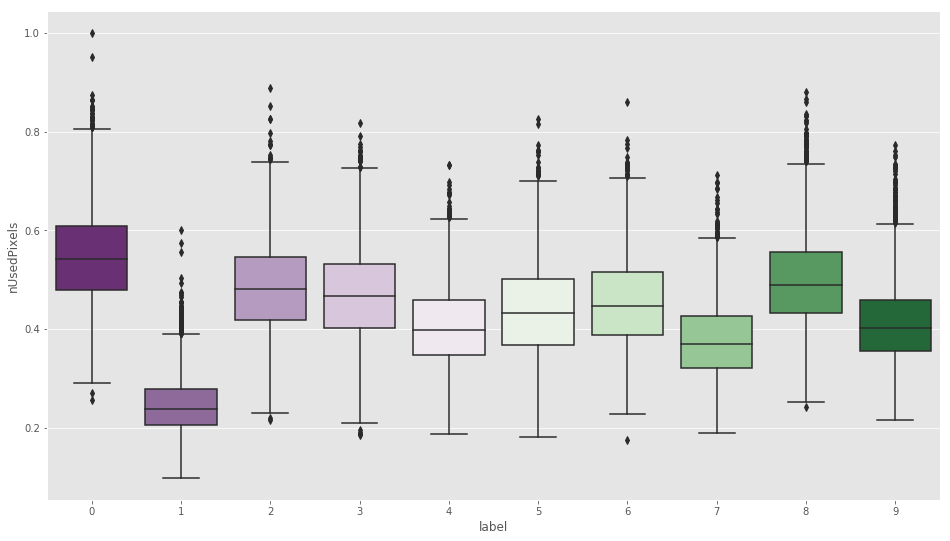

In [19]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.boxplot(x="label", y="nUsedPixels", data=data2, palette="PRGn")

In [20]:
dtrain, dtest = train_test_split(data2, test_size=0.25, random_state=570)
X = dtrain.drop(['label'], axis = 1, errors = 'ignore')
y = dtrain.label
Xtest = dtest.drop(['label'], axis = 1, errors = 'ignore')
ytest = dtest.label
print(knnTest(X, y, Xtest, ytest, k = 3))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

0.9675238095238096


## feature selection

  * We have now 706 features, can we ged rid off some of them without worsening the result? Can the results even improve?

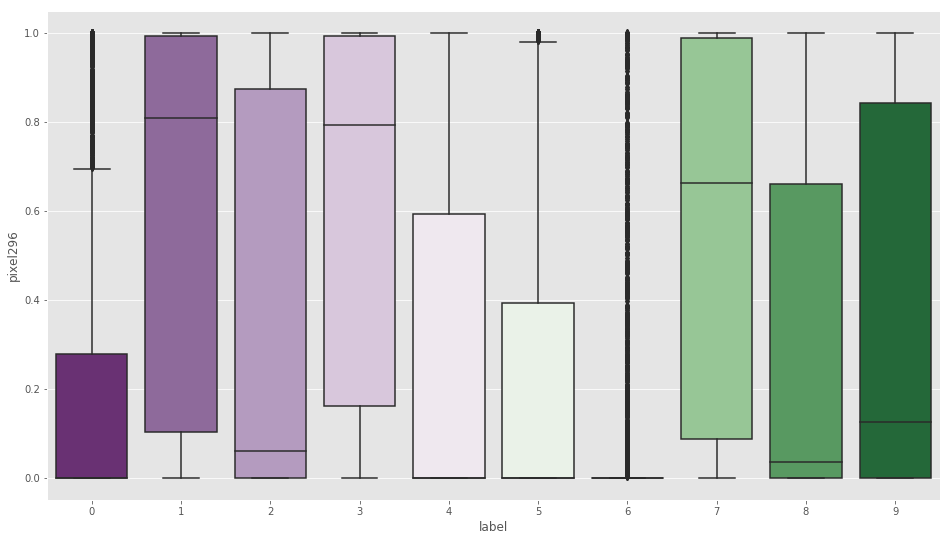

In [21]:
plt.figure(figsize=(16,9))
k = 250
sns.boxplot(x="label", y=data2.columns[k], data=data2, palette="PRGn")

  * How to recognize the "good" features?
  * One of the popular methods for **feature selection** is to measure the **mutual information**.
  * The mutual information (see MI-SPI for details) for discrete random variables $X$ and $Y$ is defined as
  $$
      I(X,Y) = \sum_x \sum_y p(x,y) \log \frac{p(x,y)}{p(x)p(y)}
  $$
  * To estimate this value using only a sample data is tricky, especialy when $X$ is discrete and $Y$ continuous as in our case, see the paper [Mutual Information between Discrete and Continuous Data Sets](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0087357) and [sklearn.feature_selection.mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#r172).
  

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
Xsm = dtrain.drop(['label'], axis = 1, errors = 'ignore')
ysm = dtrain.label
fs = SelectKBest(mutual_info_classif, k=250)
fs.fit_transform(Xsm, ysm)

array([[0.        , 0.        , 0.        , ..., 0.99215686, 0.        ,
        0.4985755 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48433048],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.53276353],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.37891738],
       [0.        , 0.        , 0.94117647, ..., 0.        , 0.        ,
        0.43589744],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.49287749]])

In [23]:
X_new = X[dtrain.loc[:,fs.get_support()].columns]
Xtest_new = Xtest[dtrain.loc[:,fs.get_support()].columns]
print(knnTest(X_new, y, Xtest_new, ytest, k = 3))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

0.965047619047619
